# Decision Tree


In [1]:
import pandas as pd
diabetes = pd.read_csv("../content/diabetes.csv")


In [2]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
diabetes.Outcome.value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

<Axes: xlabel='Outcome', ylabel='count'>

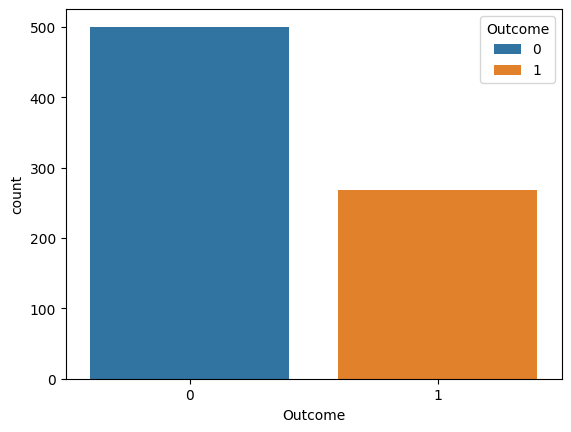

In [5]:
sns.countplot(x= "Outcome",data= diabetes, hue="Outcome")

In [6]:
X = diabetes.drop(['Outcome'], axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:
y = diabetes['Outcome']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [9]:
y_train.value_counts(normalize=True)

Outcome
0    0.654514
1    0.345486
Name: proportion, dtype: float64

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
giniDecisionTree = DecisionTreeClassifier(criterion='gini')
giniDecisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
giniPred = giniDecisionTree.predict(X_test)
giniPred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0])

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, giniPred)

array([[85, 38],
       [22, 47]])

In [14]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test, giniPred))

Accuracy Score:  0.6875


[Text(0.5585565476190476, 0.9642857142857143, 'Glucose <= 143.5\ngini = 0.452\nsamples = 576\nvalue = [377, 199]'),
 Text(0.2552083333333333, 0.8928571428571429, 'Age <= 28.5\ngini = 0.36\nsamples = 454\nvalue = [347, 107]'),
 Text(0.4068824404761905, 0.9285714285714286, 'True  '),
 Text(0.1392857142857143, 0.8214285714285714, 'Glucose <= 127.5\ngini = 0.208\nsamples = 246\nvalue = [217, 29]'),
 Text(0.07857142857142857, 0.75, 'BMI <= 49.1\ngini = 0.134\nsamples = 208\nvalue = [193.0, 15.0]'),
 Text(0.06904761904761905, 0.6785714285714286, 'BMI <= 31.4\ngini = 0.118\nsamples = 206\nvalue = [193, 13]'),
 Text(0.01904761904761905, 0.6071428571428571, 'Pedigree <= 0.672\ngini = 0.017\nsamples = 119\nvalue = [118, 1]'),
 Text(0.009523809523809525, 0.5357142857142857, 'gini = 0.0\nsamples = 103\nvalue = [103, 0]'),
 Text(0.02857142857142857, 0.5357142857142857, 'Pedigree <= 0.697\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.01904761904761905, 0.4642857142857143, 'gini = 0.0\nsamp

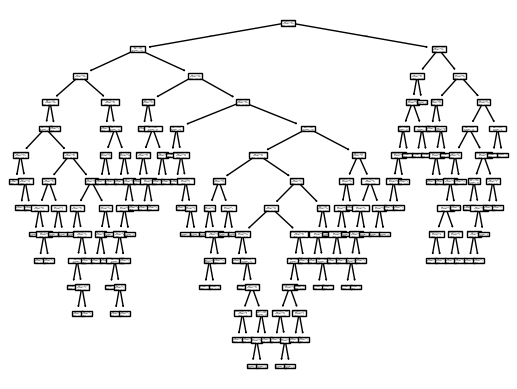

In [15]:
#features = ['Gender', 'Age', 'EstimatedSalary']
from sklearn import tree
features=diabetes.columns
tree.plot_tree(giniDecisionTree, feature_names=features)

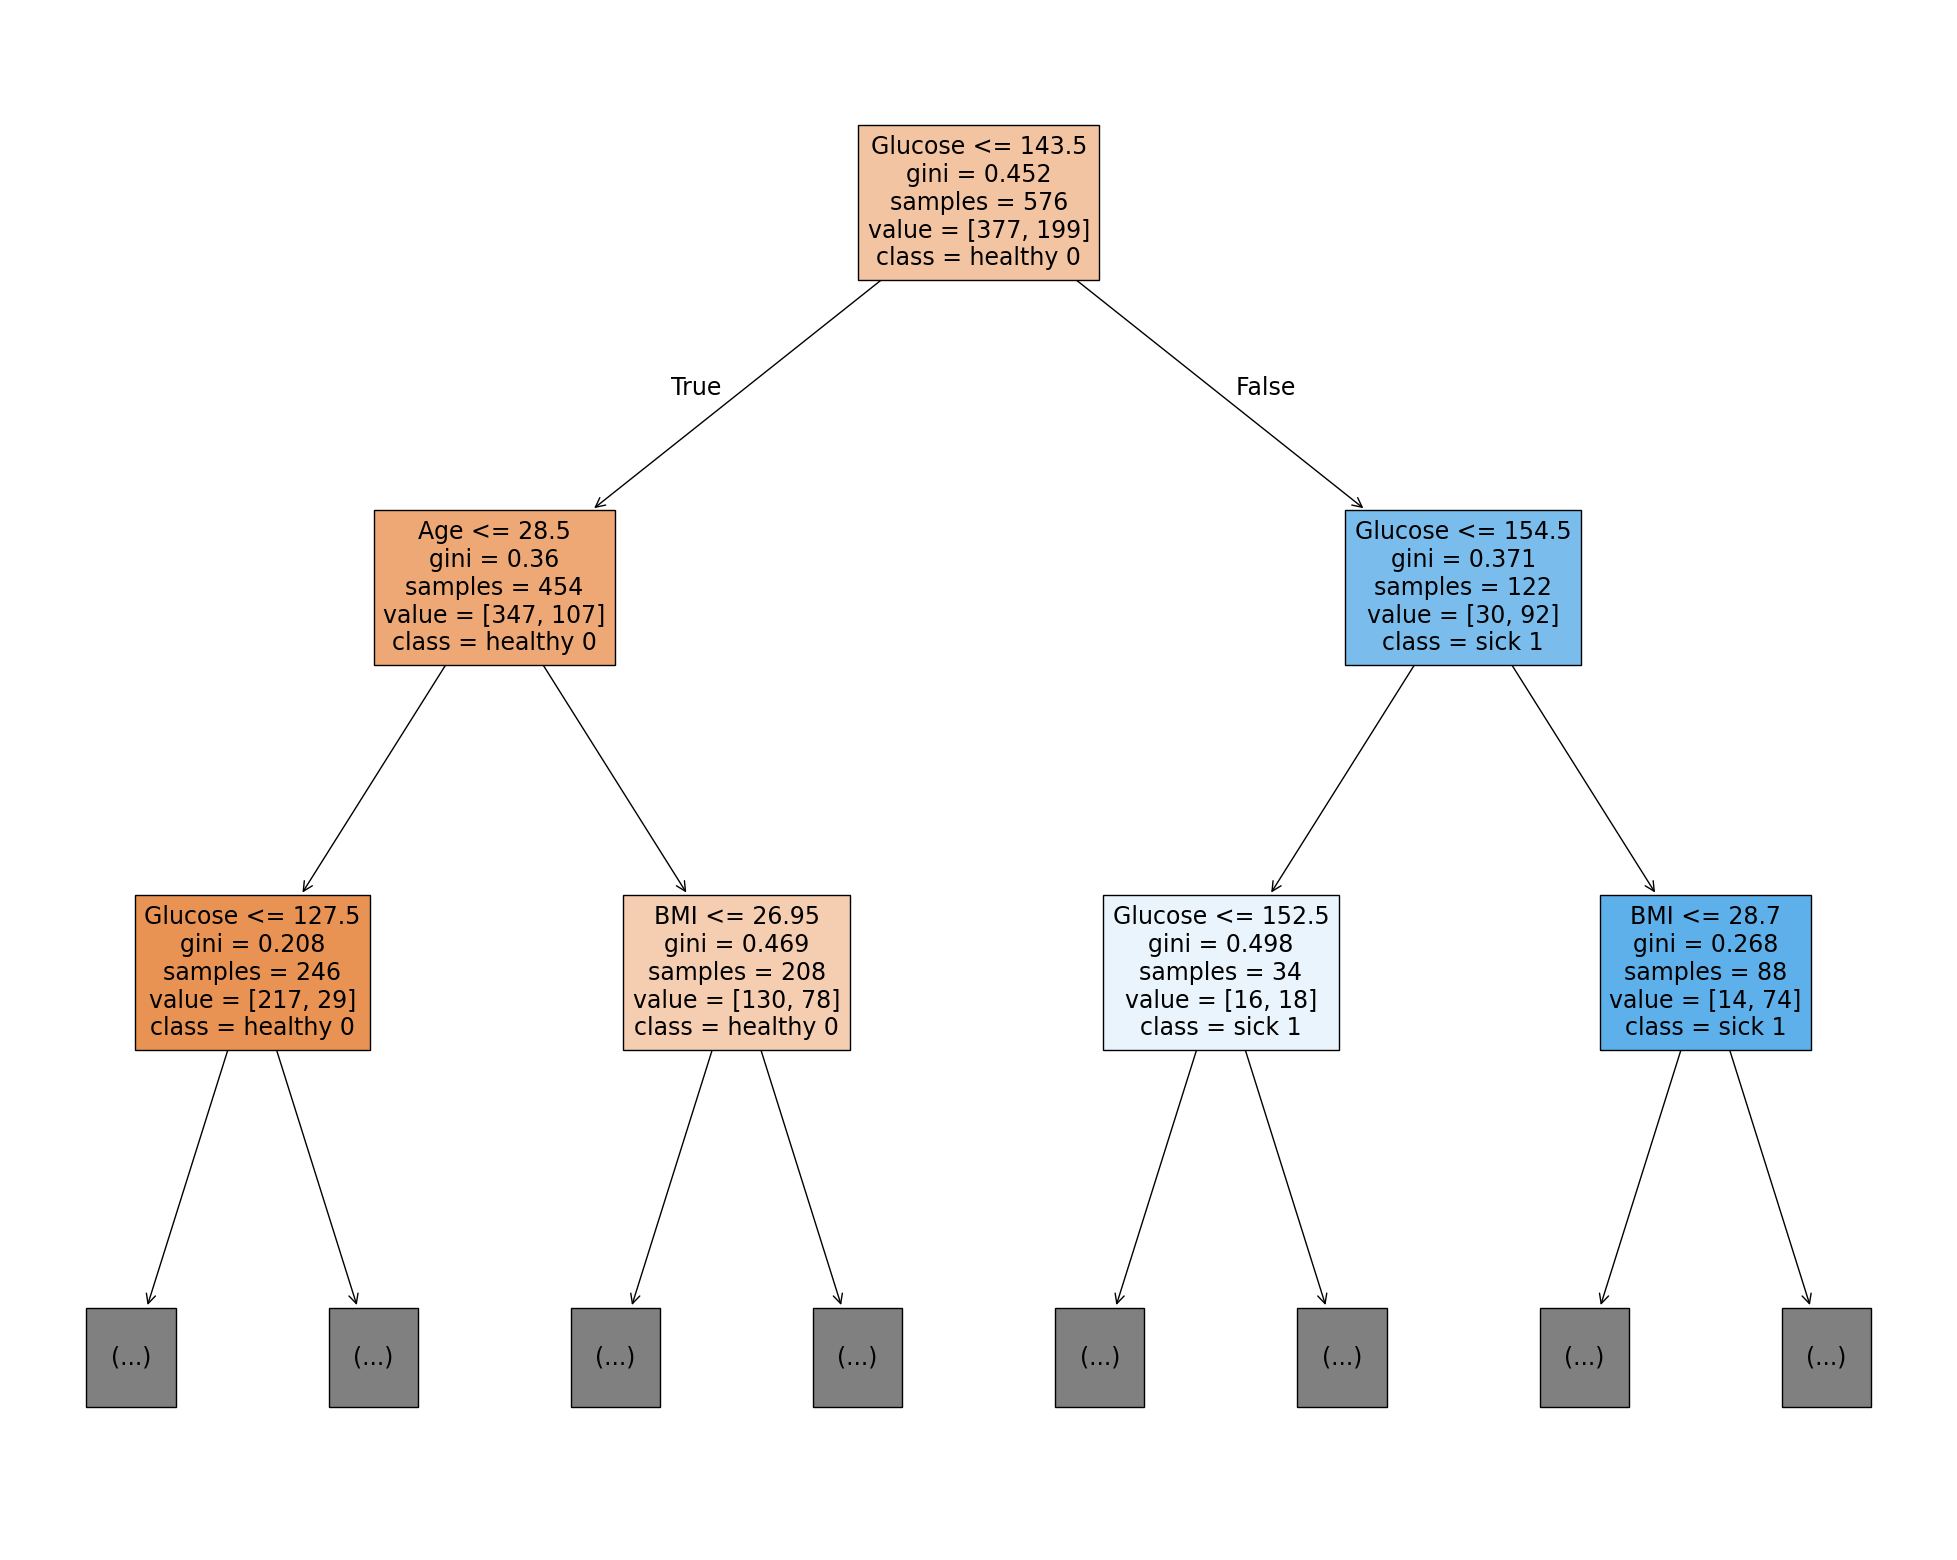

In [16]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(giniDecisionTree,
                   feature_names=features,
                   class_names = ['healthy 0', 'sick 1'],
                   max_depth=2,
                   filled=True)

In [17]:
entropyDecisionTree = DecisionTreeClassifier(criterion='entropy')
entropyDecisionTree.fit(X_train, y_train)
entropyPred = entropyDecisionTree.predict(X_test)

In [18]:
entropyDecisionTree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [19]:
print('Accuracy Score: ',accuracy_score(y_test, entropyPred))

Accuracy Score:  0.7135416666666666


In [20]:
confusion_matrix(y_test, entropyPred)

array([[95, 28],
       [27, 42]])

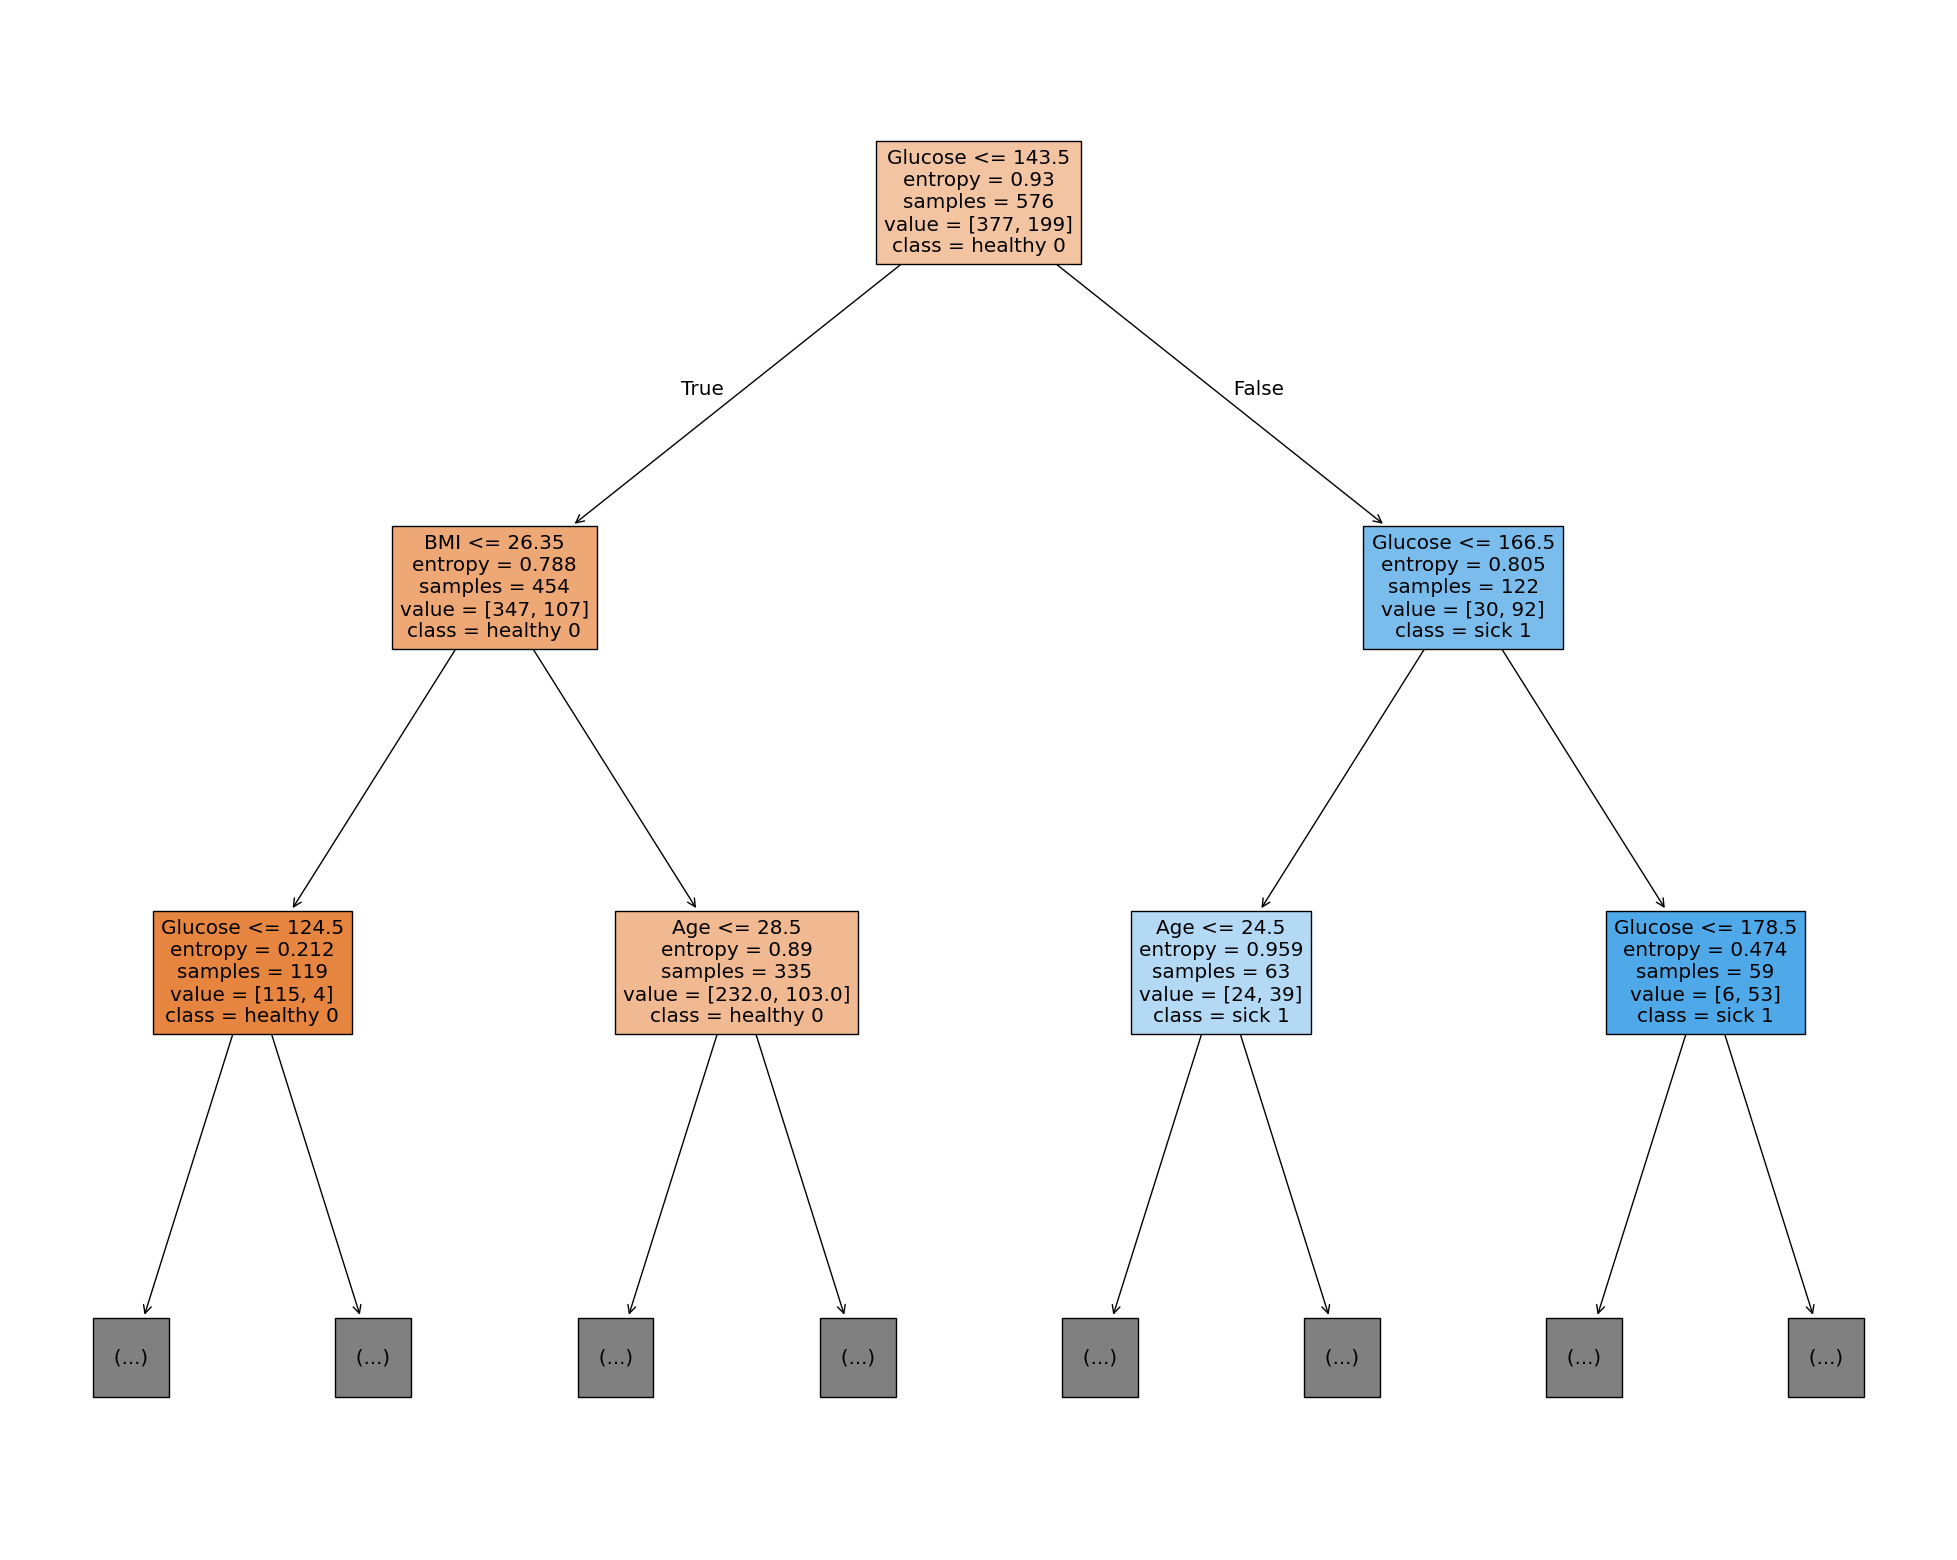

In [21]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(entropyDecisionTree,
                   feature_names=features,
                   class_names = ['healthy 0', 'sick 1'],
                   max_depth=2,
                   filled=True)

Although the trees are not equal, the obtained result is similar.

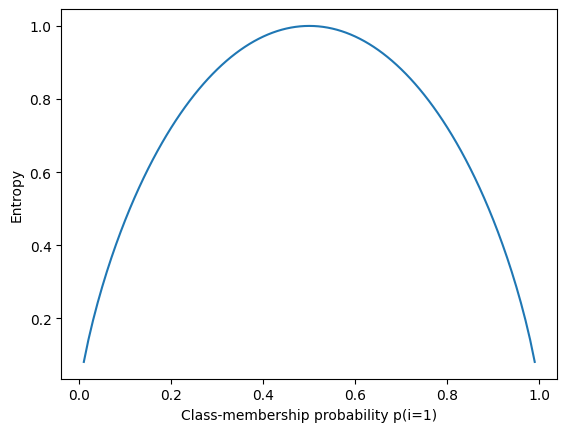

In [22]:
import numpy as np
def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None
       for p in x]

plt.ylabel('Entropy')
plt.xlabel('Class-membership probability p(i=1)')
plt.plot(x, ent)
plt.show()

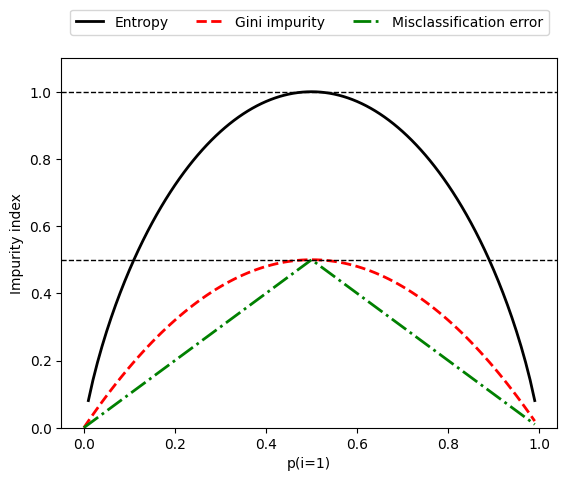

In [23]:
def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, gini(x), err],
                          ['Entropy', 'Gini impurity', 'Misclassification error'],
                          ['-', '--', '-.'],
                          ['black', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity index')
plt.show()


# Cost Complexity Pruning of Decision Trees
The overall goal is to minimize the cost-complexity function

$$
C_{\alpha}(T)=R(T)=\alpha |T|
$$
where
$|T|$  is the number of leaves in tree $T$ and $R(T)$  a loss function calculated across these leaves.

In [24]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

In [25]:
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

1.0
0.7083333333333334


In [26]:
path=model.cost_complexity_pruning_path(X_train,y_train)
alphas=path['ccp_alphas']
alphas

array([0.        , 0.00113278, 0.00138889, 0.0015191 , 0.00157828,
       0.00160256, 0.00163416, 0.00165536, 0.00166223, 0.00172152,
       0.00208333, 0.00214947, 0.00217391, 0.00218705, 0.00226878,
       0.00231481, 0.00231481, 0.00231481, 0.00231481, 0.00231481,
       0.00243056, 0.00257749, 0.00260417, 0.0026455 , 0.00274725,
       0.00277778, 0.00283565, 0.00308499, 0.00309674, 0.00315657,
       0.00322421, 0.00325521, 0.00325964, 0.003367  , 0.00340888,
       0.00356754, 0.00363757, 0.00370711, 0.00398203, 0.00404875,
       0.0040981 , 0.00416667, 0.00447609, 0.00552423, 0.00558862,
       0.00576106, 0.00603701, 0.00619195, 0.00621951, 0.00674152,
       0.00709034, 0.00826262, 0.00835794, 0.00979488, 0.01338179,
       0.01824072, 0.02587027, 0.08973394])

In [27]:
np.max(alphas)

np.float64(0.08973394008064434)

In [28]:
acc_train,acc_test=[],[]
for i in alphas:
  t=DecisionTreeClassifier(ccp_alpha=i)
  t.fit(X_train,y_train)
  y_train_pred_t=t.predict(X_train)
  y_test_pred_t=t.predict(X_test)
  acc_train.append(accuracy_score(y_train,y_train_pred_t))
  acc_test.append(accuracy_score(y_test,y_test_pred_t))

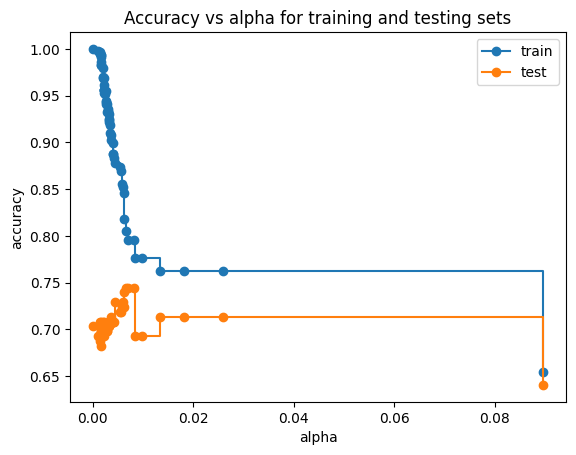

In [29]:
fig,ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(alphas, acc_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas, acc_test, marker="o", label="test", drawstyle="steps-post")
#plt.xticks(ticks=np.arange(0,0.1,0.005))
ax.legend()
plt.show()

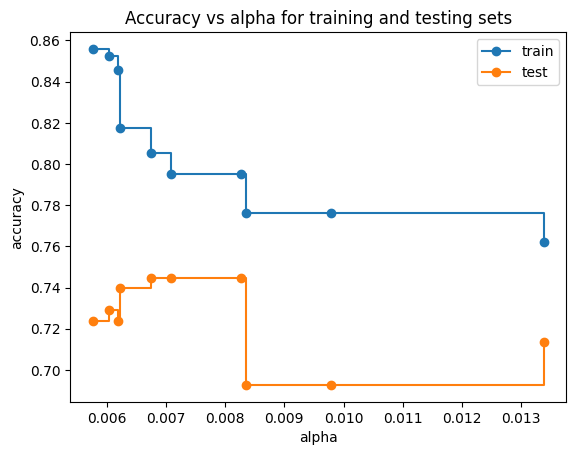

In [30]:
fig,ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(alphas[45:55], acc_train[45:55], marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas[45:55], acc_test[45:55], marker="o", label="test", drawstyle="steps-post")
#plt.xticks(ticks=np.arange(0,0.1,0.005))
ax.legend()
plt.show()

In [31]:
best_accuracy = 0
best_pruned_model = None
best_alpha=0
acc_train,acc_test=[],[]
for i in alphas:
  t=DecisionTreeClassifier(ccp_alpha=i)
  t.fit(X_train,y_train)
  y_train_pred_t=t.predict(X_train)
  y_test_pred_t=t.predict(X_test)
  accuracy=accuracy_score(y_test,y_test_pred_t)
  acc_train.append(accuracy_score(y_train,y_train_pred_t))
  acc_test.append(accuracy)
  if accuracy >= best_accuracy:
        best_accuracy = accuracy
        best_alpha = i
        best_pruned_model = t
accuracy_after_pruning = best_pruned_model.score(X_test, y_test)
print("Accuracy after pruning:", accuracy_after_pruning)
print("Best alpha:", best_alpha)

Accuracy after pruning: 0.7447916666666666
Best alpha: 0.00826262260989842


In [32]:
best_ccp_model=DecisionTreeClassifier(ccp_alpha=best_alpha)
best_ccp_model.fit(X_train,y_train)
y_test_pred_best=best_ccp_model.predict(X_test)

In [33]:
print('Accuracy Score: ',accuracy_score(y_test, y_test_pred_best))
confusion_matrix(y_test, y_test_pred_best)

Accuracy Score:  0.7447916666666666


array([[98, 25],
       [24, 45]])

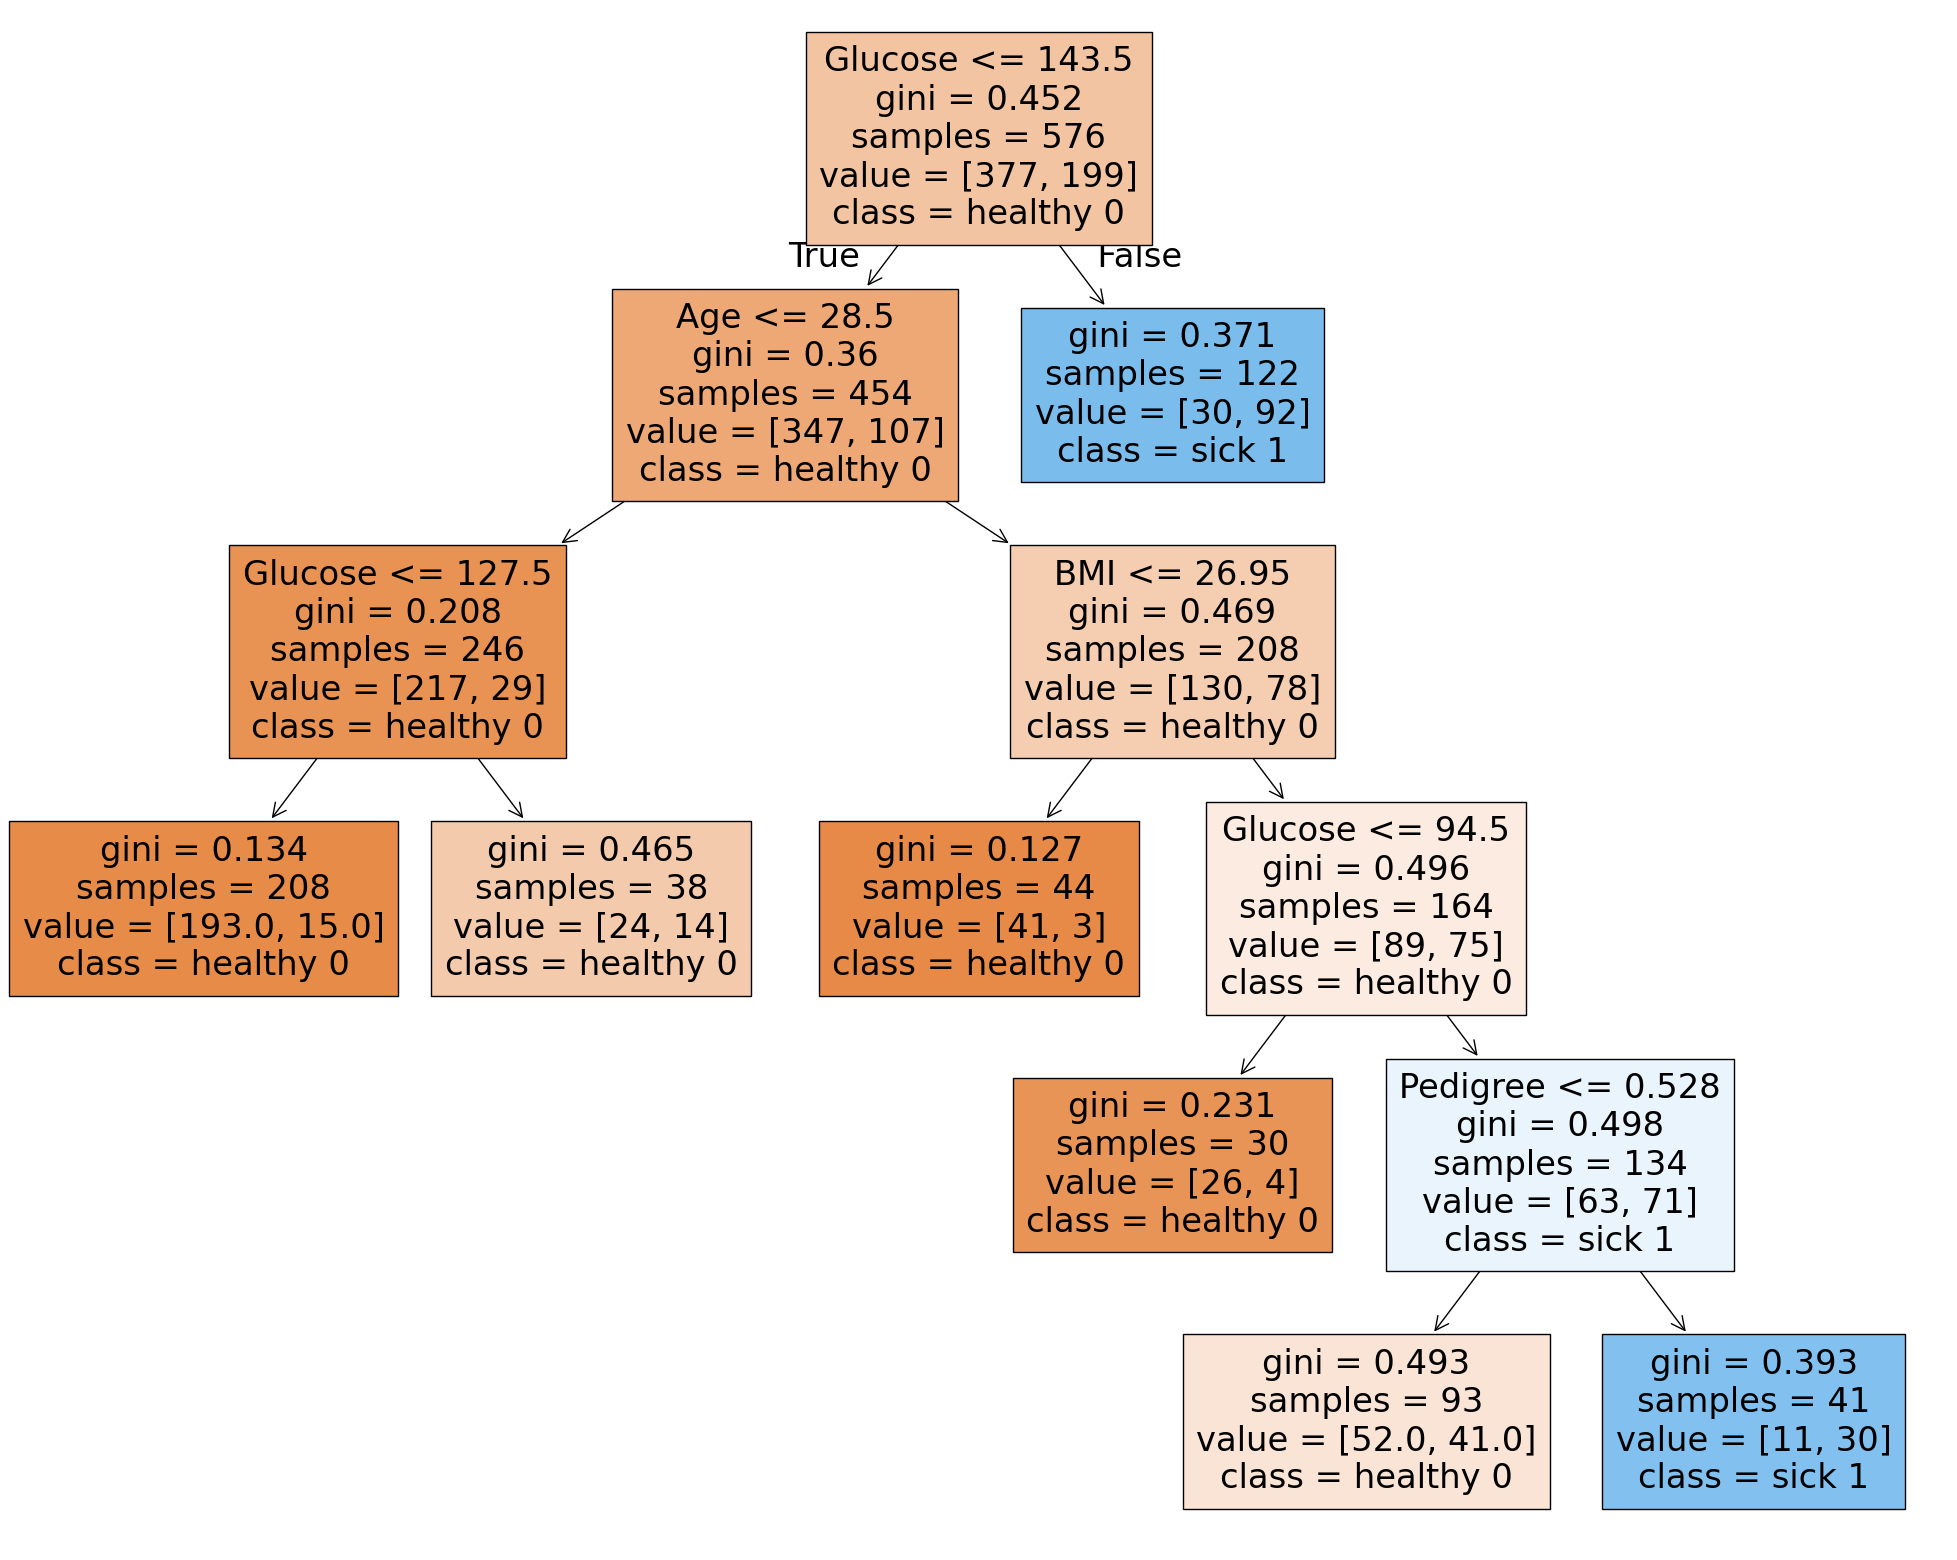

In [34]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_ccp_model,
                   feature_names=features,
                   class_names = ['healthy 0', 'sick 1'],
                   filled=True)

# GridSearchCV
Hyperparameter tuning is a technique which uses GridSearchCV. Hyperparameter tuning involves searching for the optimal hyperparameters for a machine learning model to improve its performance. It does not directly prune the decision tree, but it helps in finding the best combination of hyperparameters.

In [35]:
parameter = {
    'criterion' :['entropy','gini'],
    'max_depth':[1,2,3,4,5,6,7]
}

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(model,param_grid = parameter)
gs.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7]})

In [36]:
best_estimator = gs.best_estimator_
gs.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [37]:
gs.score(X_test,y_test)

0.6822916666666666

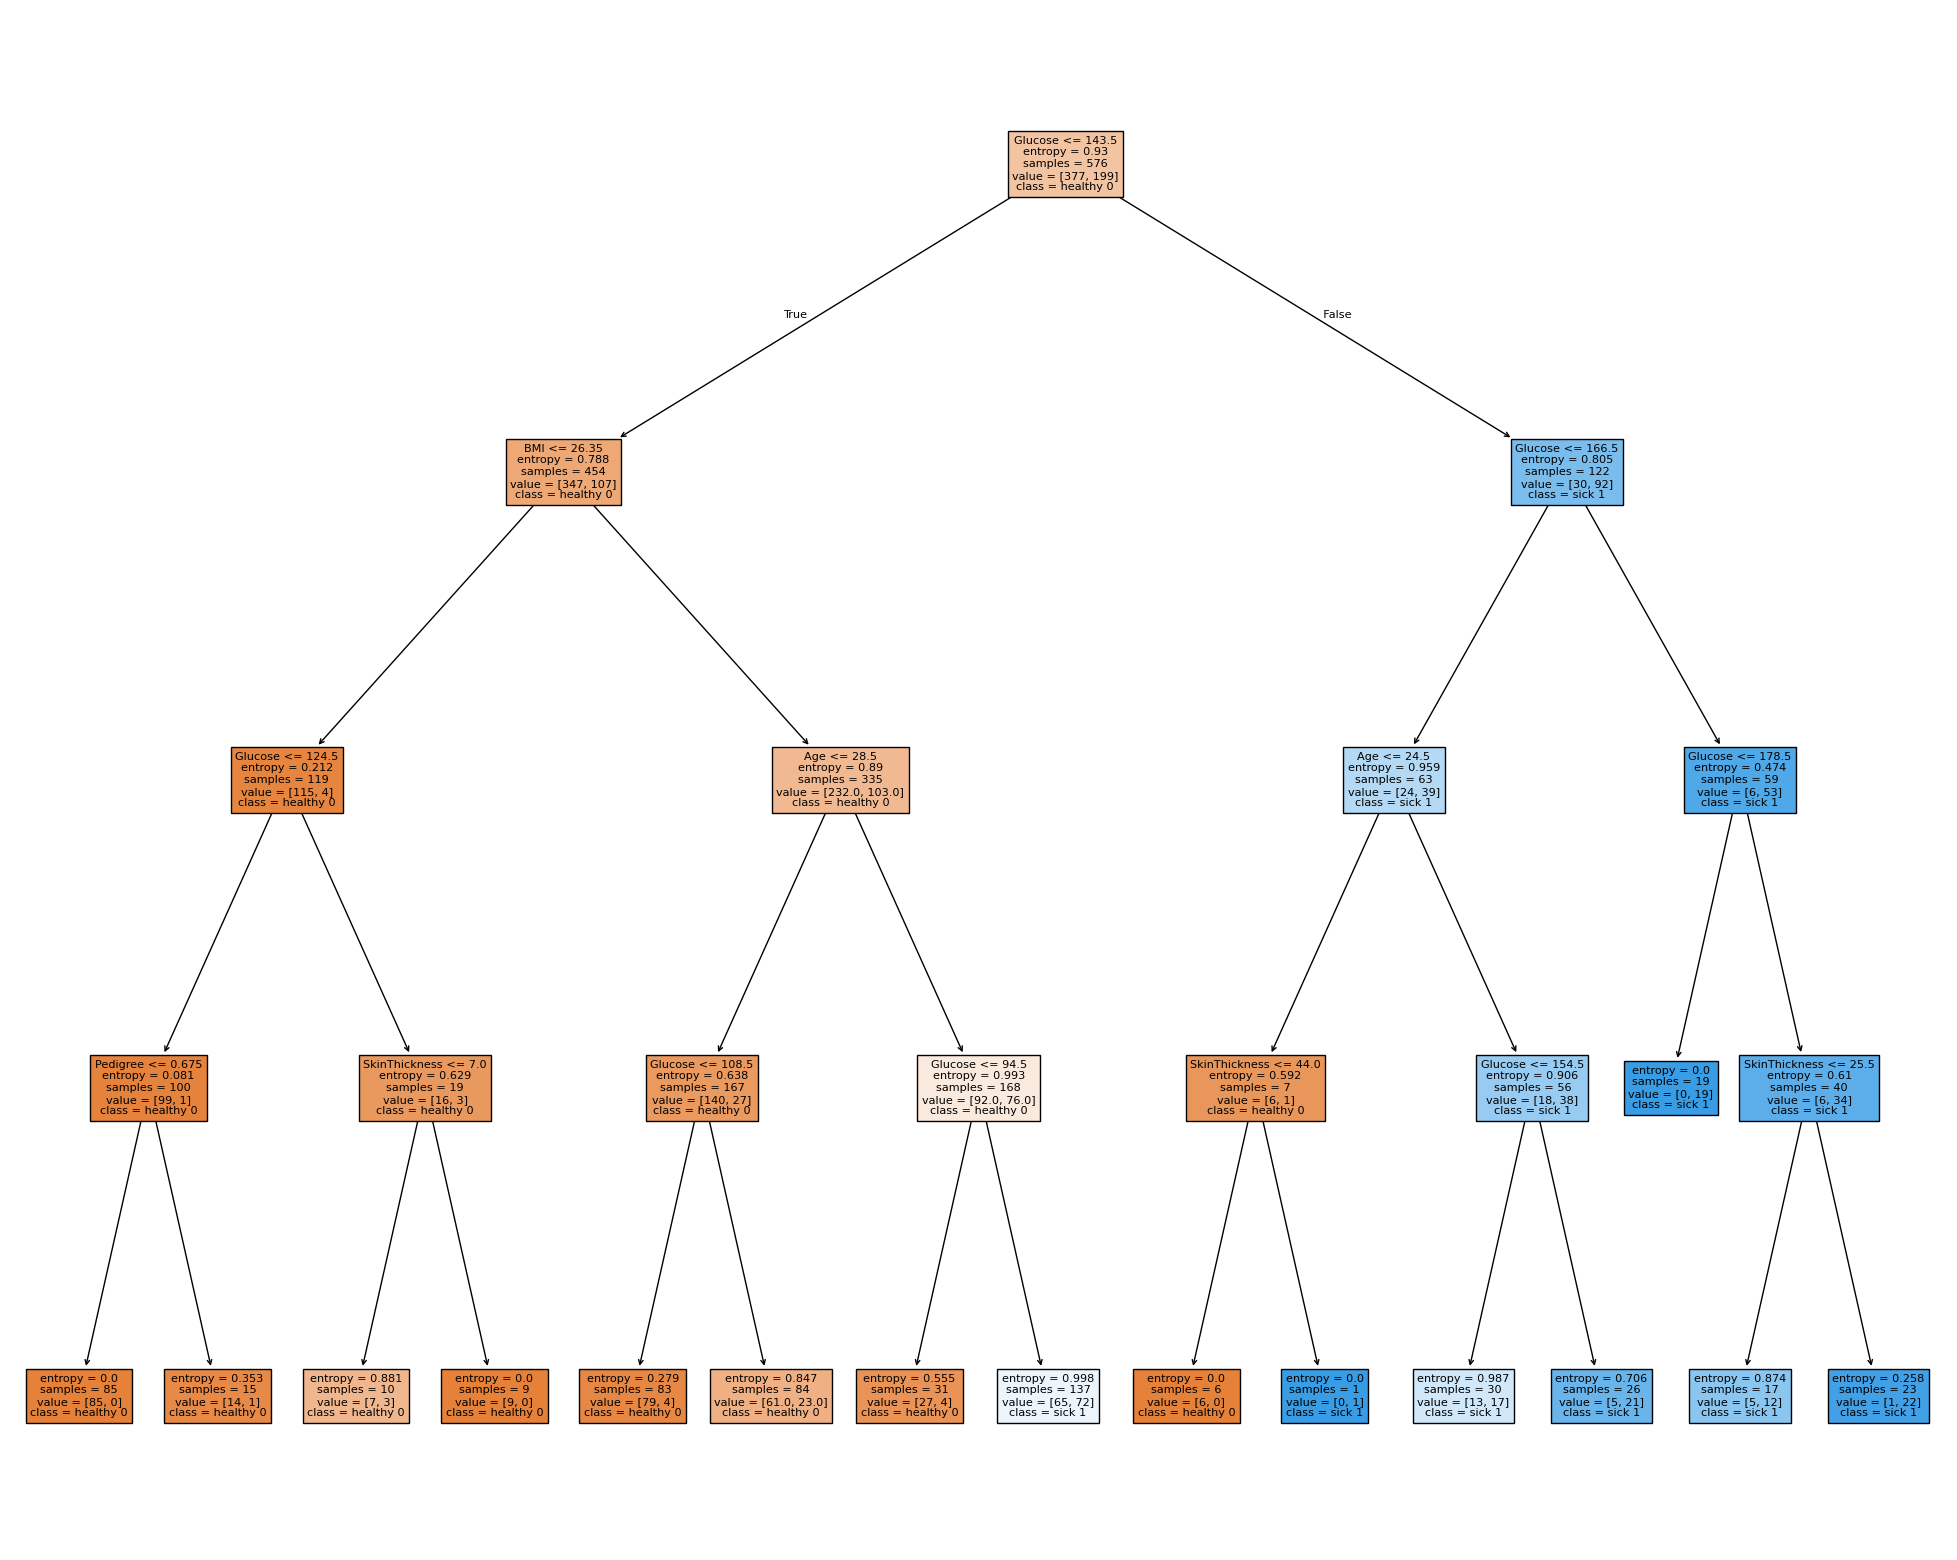

In [38]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_estimator,
                   feature_names=features,
                   class_names = ['healthy 0', 'sick 1'],
                   filled=True)